<a href="https://colab.research.google.com/github/ngonam2403/VEF-ML-2020/blob/main/gcolab_HHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mô tả bài toán & Mô tả dữ liệu

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import numpy as np


In [16]:
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#main
link_DIHY3 = 'https://www.dropbox.com/s/ft7mxwfvgpa1byj/DaysInHospital_Y3.csv?dl=1' #https://mc.ai/how-to-upload-big-dataset-on-google-colab/
link_Claim = 'https://www.dropbox.com/s/zx202lui7dg0x0d/Claims.csv?dl=1'
link_Member = 'https://www.dropbox.com/s/rxp8lo69qw52767/Members.csv?dl=1'
link_Target = 'https://www.dropbox.com/s/nrg7lbag41zlqwn/Target.csv?dl=1'

#other
link_DrugCount = 'https://www.dropbox.com/s/4c2rx63rlsq4zam/DrugCount.csv?dl=1'
link_LabCount = 'https://www.dropbox.com/s/97z8pyafnpgg4fc/LabCount.csv?dl=1'

In [10]:
#main
link_DIHY2 = 'https://www.dropbox.com/s/doi3fre4121r966/DaysInHospital_Y2.csv?dl=1'

Import Data

In [4]:
df_DIYH3 = pd.read_csv(link_DIHY3)
df_Claim = pd.read_csv(link_Claim)
df_Member = pd.read_csv(link_Member)
df_Target = pd.read_csv(link_Target

df_DrugCount = pd.read_csv(link_DrugCount)
df_LabCount = pd.read_csv(link_LabCount)

In [11]:
df_DIYH2 = pd.read_csv(link_DIHY2)

In [6]:
#PHAN TICH: DAYINHOSPITAL

df_DIYH3.head(5)

,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,85160905,0,0
2,45496648,0,0
3,45162557,0,0
4,68793937,0,0


In [7]:
df_DIYH3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71435 entries, 0 to 71434
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MemberID         71435 non-null  int64
 1   ClaimsTruncated  71435 non-null  int64
 2   DaysInHospital   71435 non-null  int64
dtypes: int64(3)
memory usage: 1.6 MB


In [8]:
df_DIYH3['ClaimsTruncated'].value_counts()

0    67391
1     4044
Name: ClaimsTruncated, dtype: int64

In [15]:
df_DIYH2['ClaimsTruncated'].value_counts()

0    72067
1     3971
Name: ClaimsTruncated, dtype: int64

In [14]:
df_DIYH3['DaysInHospital'].value_counts().sort_index()

0     60706
1      4464
2      2182
3      1429
4       842
5       528
6       287
7       218
8       143
9       115
10      103
11       65
12       62
13       50
14       23
15      218
Name: DaysInHospital, dtype: int64

In [13]:
df_DIYH2['DaysInHospital'].value_counts().sort_index()

0     64269
1      4835
2      2366
3      1453
4       977
5       565
6       373
7       256
8       173
9       148
10      106
11       80
12       73
13       61
14       42
15      261
Name: DaysInHospital, dtype: int64

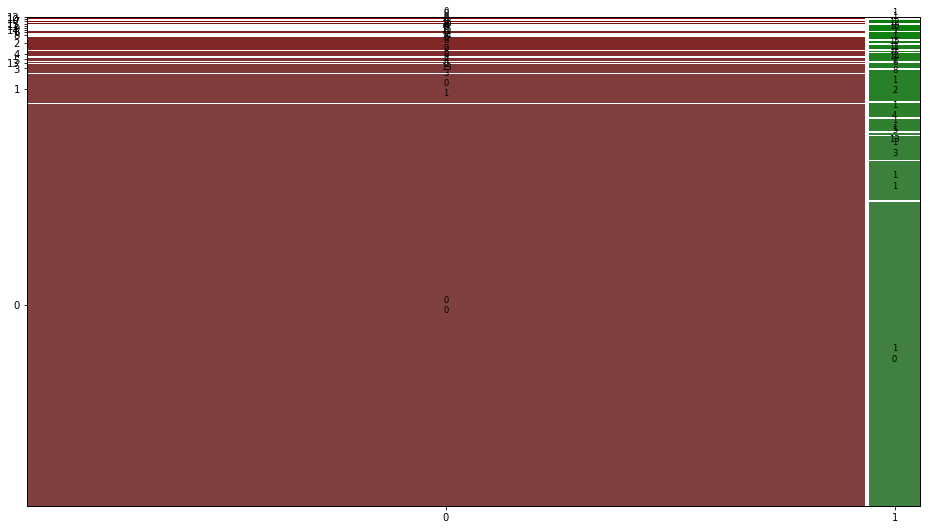

In [29]:
props = {}
# Dictionary introduced here
col_dic = {'short': 'purple', 'medium': 'blue', 'long': 'yellow'}
for x in ['small', 'large']:
    for y, col in col_dic.items():
        props[(x, y)] ={'color': col}

mosaic(
    df_DIYH3,
    ['ClaimsTruncated','DaysInHospital'],
    properties = props
    )
# plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [46]:
df_vc = df_DIYH3['MemberID'].value_counts()
# df_vc = pd.DataFrame(df_vc, columns = ['CountRecord','Na'])
# df_vc.sort_values(by = 'CountRecord', ascending=False)
df_vc.iloc[-1]

1

==> kế hoạch phân tích thêm DIHY3?

data type: numeric, categorical (nomial / ordinal)



*   Phân bố của DaysInHospital: select DaysInHospital, count(1), count(distinct MemberID)
*   Phân bố của ClaimsTruncated



In [5]:
#PHAN TICH: CLAIM

df_Claim.head(5)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [47]:
df_Claim.dtypes

MemberID                   int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                      object
Specialty                 object
PlaceSvc                  object
PayDelay                  object
LengthOfStay              object
DSFS                      object
PrimaryConditionGroup     object
CharlsonIndex             object
ProcedureGroup            object
SupLOS                     int64
dtype: object

In [48]:
df_Claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  object 
 11  CharlsonIndex          object 
 12  ProcedureGroup         object 
 13  SupLOS                 int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB


In [50]:
df_Claim.describe()

,MemberID,ProviderID,Vendor,PCP,SupLOS
count,2.668990e+06,2.652726e+06,2.644134e+06,2.661498e+06,2.668990e+06
mean,4.998824e+07,5.070900e+06,3.806974e+05,5.133819e+04,4.245801e-03
std,2.892240e+07,2.868035e+06,2.729317e+05,2.920591e+04,6.502135e-02
min,4.000000e+00,4.720000e+02,3.900000e+01,7.400000e+01,0.000000e+00
25%,2.480119e+07,2.467684e+06,1.526100e+05,2.746700e+04,0.000000e+00
50%,4.992606e+07,5.442161e+06,2.518090e+05,4.799000e+04,0.000000e+00
75%,7.532789e+07,7.053364e+06,5.885440e+05,7.587600e+04,0.000000e+00
max,9.999882e+07,9.999241e+06,9.998740e+05,9.990500e+04,1.000000e+00


In [53]:
list_columns_of_Claims = df_Claim.columns.tolist()
type(list_columns_of_Claims) 

list

In [58]:
for col in list_columns_of_Claims:
  print(df_Claim[col].value_counts().sort_index())
  print("----")

4            1
210         18
3197        21
3457         1
3713        10
            ..
99996214     1
99997485     3
99997895    14
99998627    10
99998824     8
Name: MemberID, Length: 113000, dtype: int64
----
472.0         7
1733.0        1
1864.0        1
2102.0        6
3731.0       20
             ..
9997391.0    10
9998428.0     2
9998430.0    29
9998650.0     1
9999241.0     9
Name: ProviderID, Length: 14699, dtype: int64
----
39.0         131
295.0         19
340.0       1266
424.0          9
619.0       1477
            ... 
998948.0       3
999364.0    1195
999462.0     650
999829.0      57
999874.0     253
Name: Vendor, Length: 6387, dtype: int64
----
74.0         2
132.0      101
193.0       10
395.0       14
534.0       47
          ... 
99649.0    564
99693.0      3
99826.0     48
99872.0     67
99905.0    104
Name: PCP, Length: 1359, dtype: int64
----
Y1    865689
Y2    898872
Y3    904429
Name: Year, dtype: int64
----
Anesthesiology                33435
Diagnostic I

In [ ]:
#detect missing data


==> kế hoạch phân tích thêm Claim?

data type: numeric, categorical (nomial / ordinal)



*   Đếm số Member theo Year




Loại bỏ biến LengthOfStay do có 80% missing value.

ProviderID, Vendor and PCP: do đây là Random Number nên xử lý bằng cách tạo biến Category nhận 2 giá trị: has và N/A.

In [6]:
df_Member.head(5)

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M
2,17320609,70-79,M
3,69690888,40-49,M
4,33004608,0-9,M


data type: numeric, categorical (nomial / ordinal)

In [7]:
df_Target.head(5)

,MemberID,ClaimsTruncated,DaysInHospital
0,20820036,0,NaN
1,14625274,1,NaN
2,99227820,0,NaN
3,74486714,0,NaN
4,92341995,0,NaN


data type: numeric, categorical (nomial / ordinal)

# Run Model on cases

In [ ]:
# def hàm chạy 
def run_model(Data = cleaned_data, AlgorithmChoice = 'LogisticRegression'):
  X_train, y_train, X_test, y_test = train_test_split(Data)
  train
  result_summary_coefficient
  score

In [ ]:
#list các case để so sánh

data1 = Y + X1
data2 = Y + X1, X2
data3 = Y + all X
data4 = Y + Engineered Xs only

In [ ]:
for data in [data1, data2, data3, data4]:
  run_model(data)